<a href="https://colab.research.google.com/github/ArefMYTB/Human_parsing/blob/master/get_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab file is demo for Self Correction Human Parsing.
</br> Please select GPU as runtime before running the code

In [1]:
!pip install ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 3.0 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing
!mkdir checkpoints
!mkdir inputs
!mkdir outputs

Cloning into 'Self-Correction-Human-Parsing'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (719/719), done.
remote: Compressing objects: 100% (568/568), done.
remote: Total 719 (delta 149), reused 611 (delta 140), pack-reused 0
Receiving objects: 100% (719/719), 3.88 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/Self-Correction-Human-Parsing


Select dataset below

In [3]:
dataset = 'lip'         #select from ['lip', 'atr', 'pascal']

In [4]:
import gdown

if dataset == 'lip':
    url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
elif dataset == 'atr':
    url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
elif dataset == 'pascal':
    url = 'https://drive.google.com/uc?id=1E5YwNKW2VOEayK9mWCS3Kpsxf-3z04ZE'

output = 'checkpoints/final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/Self-Correction-Human-Parsing/checkpoints/final.pth
100%|██████████| 267M/267M [00:06<00:00, 39.5MB/s]


'checkpoints/final.pth'

In [8]:
#Please select images which you want to upload
%cd inputs
from google.colab import files
uploaded = files.upload()
%cd ..

/content/Self-Correction-Human-Parsing/inputs


Saving 000220_0.jpg to 000220_0.jpg
/content/Self-Correction-Human-Parsing


In [10]:
!python3 simple_extractor.py --dataset 'lip' --model-restore 'checkpoints/final.pth' --input-dir 'inputs' --output-dir 'outputs' --logits

Evaluating total class number 20 with ['Background', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'Upper-clothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left-arm', 'Right-arm', 'Left-leg', 'Right-leg', 'Left-shoe', 'Right-shoe']
100% 3/3 [00:02<00:00,  1.03it/s]


# Download the generated images from *outputs* folder

In [26]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [27]:
image = cv2.imread("/content/Self-Correction-Human-Parsing/outputs/000074_0.png")
image.shape

(1100, 762, 3)

In [13]:
dataset = np.load('/content/Self-Correction-Human-Parsing/outputs/000074_0.npy', encoding='bytes')

In [25]:
dataset.shape

(1100, 762, 20)

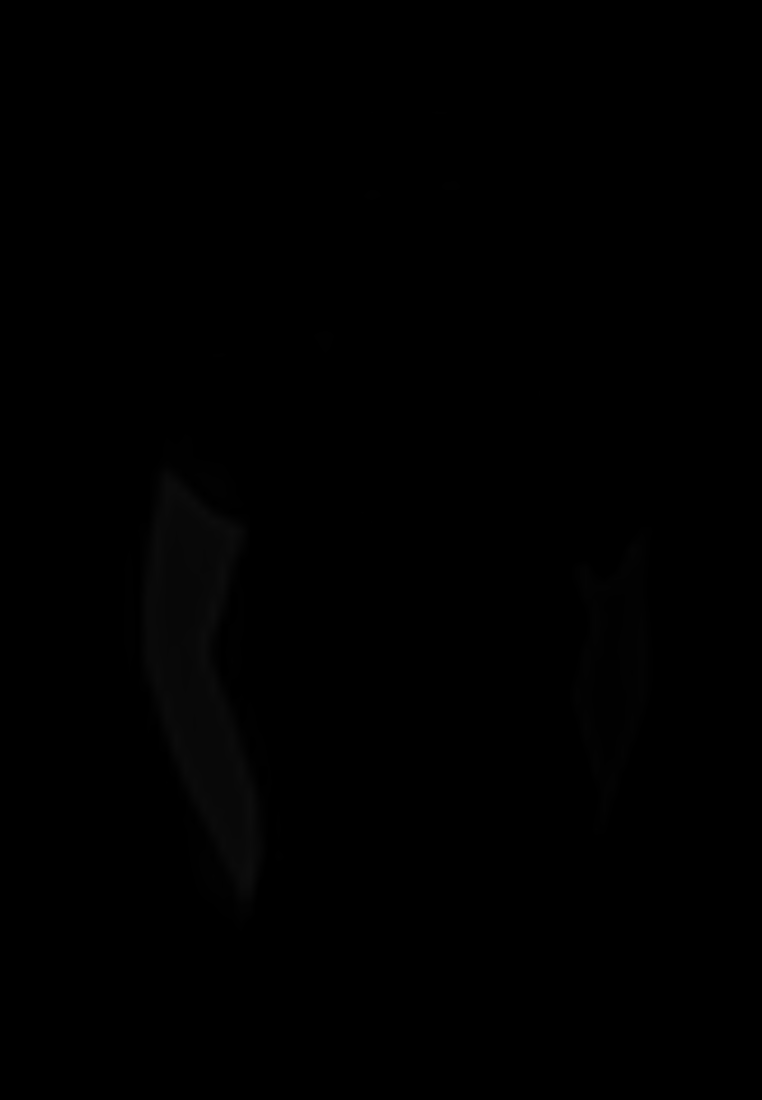

In [49]:
cv2_imshow(dataset[:, :, 15])

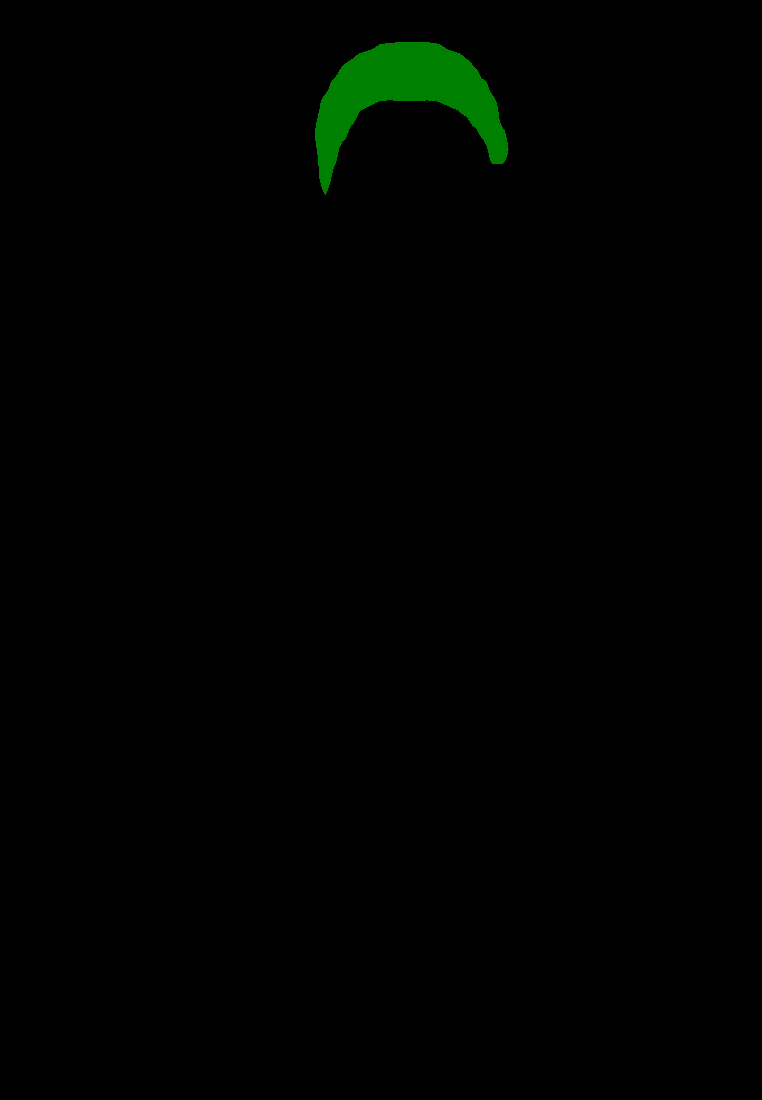

In [72]:
selected_class_index = 2

selected_class_mask_values = dataset[:, :, selected_class_index]

threshold = 6
# Create a mask based on the threshold
selected_class_mask = selected_class_mask_values >= threshold

# Create a mask with the same shape as the image
image_mask = np.zeros_like(image, dtype=bool)

selected_class_pixels = image.copy()
selected_class_pixels[~selected_class_mask] = 0
cv2_imshow(selected_class_pixels)